# Naive Bayes Classification

Naive Bayes algorithm is based on Bayes theory on conditional probability. Naive Bayes is one of the simplest algorithms. But it is not very easy to implement. Because to find individual probabilities, you have to separate the different classes, then for each feature in each class, you have to find the probability of each value of feature.

# Import Libraries and Data set

In [1]:
#import numpy and pandas
import numpy as np
import pandas as pd
import os
from pathlib import Path

cwd = os.getcwd()

In [2]:
#import dataset from csv 
df = pd.read_csv(Path(cwd, 'heart.csv'))
#view the dataset once
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#print column names 
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Since we will be using this algorithm for classification, let us set the target class first

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting dataset into test and train

In [5]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(y_pred)

[0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0]


# Probabilities Calculation

In [7]:
gnb.predict_proba(X_test)

array([[9.94248127e-01, 5.75187329e-03],
       [7.49570861e-01, 2.50429139e-01],
       [9.64596361e-01, 3.54036391e-02],
       [1.54882002e-02, 9.84511800e-01],
       [9.92695908e-01, 7.30409155e-03],
       [6.64010731e-01, 3.35989269e-01],
       [1.26570996e-02, 9.87342900e-01],
       [6.05319210e-01, 3.94680790e-01],
       [2.02477056e-03, 9.97975229e-01],
       [9.95331790e-01, 4.66821046e-03],
       [4.09361928e-04, 9.99590638e-01],
       [9.98933538e-01, 1.06646187e-03],
       [4.50488573e-01, 5.49511427e-01],
       [5.84792859e-01, 4.15207141e-01],
       [9.96983487e-01, 3.01651308e-03],
       [9.05928998e-01, 9.40710020e-02],
       [9.99997382e-01, 2.61809548e-06],
       [9.99984090e-01, 1.59104464e-05],
       [1.44683308e-02, 9.85531669e-01],
       [9.97341173e-01, 2.65882665e-03],
       [9.99191022e-01, 8.08978473e-04],
       [4.60695948e-02, 9.53930405e-01],
       [4.00688391e-02, 9.59931161e-01],
       [1.07009597e-02, 9.89299040e-01],
       [9.945512

In [8]:
print(f"Test Accuracy: {gnb.score(X_test, y_test)}")

Test Accuracy: 0.7912087912087912


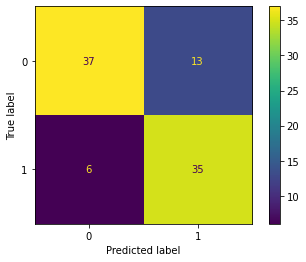

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gnb.classes_).plot()

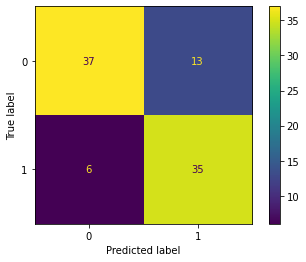

In [21]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(gnb.predict(X_train), y_train), display_labels=gnb.classes_).plot()

In [16]:
print('Training Accuracy: {}'.format((gnb.score(X_train, y_train))))

Training Accuracy: 0.8490566037735849


## Multi-class classification

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [25]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values
y = df.loc[:,['target']].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']


/mnt/c/Users/abhis/.pyenv/versions/3.10.1/envs/intellipaat_ds/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


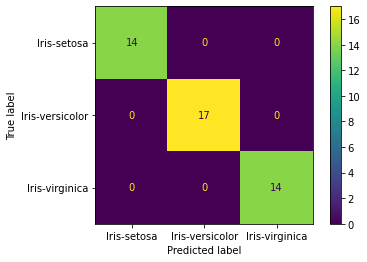

In [28]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gnb.classes_).plot()

In [29]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


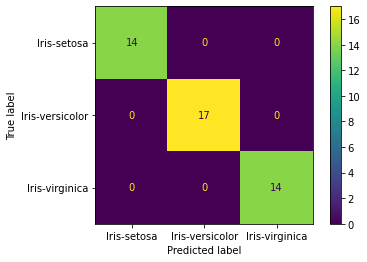

In [31]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gnb.classes_).plot()

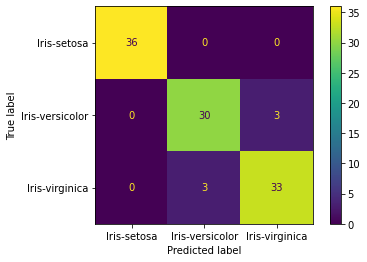

In [33]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(gnb.predict(X_train), y_train), display_labels=gnb.classes_).plot()